## A7 : Mission Emergency- An Investigative analysis on Cincinnati 911 Calls

Sandhya Tharanian <br />
DATA 512 Final Project <br />
University of Washington

### I. Introduction

Be it an extreme personal crisis or community wide disaster, 911 is the first access point for those seeking emergency response across America. 911 workers receive calls and expertly dispatch emergency service professionals and equipment to render life-saving assistance to those in need which is why we rely on this system to assure the public’s safety every day. As per the 911 statistics published by the National Emergency Number Association [NENA](https://www.nena.org/page/911Statistics),

> “An estimated 240 million calls are made to 9-1-1 in the U.S. each year.”

Thus, making the analysis of 911 calls a major initiative to help provide huge and largely untapped opportunity for researchers and practitioners to inform and transform policing policy and practice including developing alternatives to police emergency response. This project aims at analyzing the 911 call to discover hidden trends and patterns between call volume and time of the day, perform descriptive analysis to understand factors that contribute to high call volumes and look at the overall call response time. 

### II. Background work

Due to the magnitude and extent to which 911 system can cause impact, there are several ongoing works by various organizations to understand this dataset. Below are some of the examples which served as a motivation factor for the inception of this project.

**The Tamir Rice case**

> On November 22, 2014, a 911 caller to the Cleveland Police Department reported a “guy with a gun” pointing it at people at a neighborhood recreation center. The 911 caller said the person was “probably a juvenile” and the gun was “probably fake.” The call was quickly relayed to the police dispatcher, who sent the closest available unit to the scene. However, the critical clarifying information—that the subject was probably a juvenile and the gun was probably fake—was never passed along to the responding officers. Minutes later, a Cleveland police officer and his trainee arrived at the scene, pulled their cruiser right up on the subject, and within seconds shot and killed 12-year-old Tamir Rice.

An article $^{[1]}$ published by the police executive Research forum spells out the key issues of withholding critical information from a 911 call dispatcher by examining controversial incidents involving police use of force. The Tamir Rice case highlighted the importance of the police dispatch function in these incidents. When 911 dispatchers are able to provide responding officers with critically important information about the nature of a call for service, there is a much better chance of a successful outcome. But if officers arrive at the scene unaware of key facts, the risks to everyone multiplies.

Another article $^{[2]}$ published in the National Institute of Justice NIJ journal, uses 911 calls for service, field interview reports, crime incident narrative reports and site security logs to detect terrorism threats. An excerpt from the article states,

> “Our study showed that simple analytic processes could produce operationally relevant findings from 911 calls.”

In the paper $^{[3]}$, “Analysis and Prediction of 911 Calls based on Location using Spark Big Data Platform”, the authors use various ML algorithms to predict the number of calls from a particular location using longitude and latitude data with an intention to help manage police resources.

### III. About the Cincinnati  911 dataset

The dataset used for this project is obtained from the City of Cincinnati's computer aided dispatch (CAD) database which contains fire incident responses including emergency medical services (EMS) calls, fires, rescue incidents, and all other services handled by the fire Department. This dataset is updated daily and is available as a public domain which allows to freely share and use the data for any purpose and without any restrictions $^{[4]}$. Refer to the "[A7 Data Retrieval - Scrubbing.ipynb](https://github.com/sandhyatharanian/data-512-finalproject/blob/main/A7%20Data%20Retrieval%20-%20Scrubbing.ipynb)" for instructions on how to download and scrub the data if you would like to duplicate the entire process and/or expand the analysis to more recent data.

### IV. Research Questions

**RQ1:**
In the last 5 years, what are the top reasons that contribute to emergency and non-emergency 911 calls?

**RQ2:** <br>
a. How long does it actually take from the time you dial 911 for the first responders to arrive (average response time)? <br>
b. Has the response time reduced over the years and is it lesser for emergency calls?

**RQ3:**
Does temporal variations in emergency calls exists within weekdays and time of the day?

### V. Methodology

Most of the analysis involved grouping the data further to to create a new subsets and calculations based off of the existing columns. The data was then sliced into meaningful categories and various pandas functions like value_counts, count and describe was applied. Descriptive analysis was performed for calculating the average response time and reasons contributing to high call volumes stratified by emergency type. Various plots were used to understand the association of 911 calls between weekdays, and time of day. Plotting the data was important since it provided the best way to compare data over various subsets and time.

### VI. Findings

###### Initial exploration of the dataset

Let’s begin by installing and importing the necessary packages\libraries. This is a fundamental step required in every exploratory data analysis process.

In [1]:
# Install tabulate 
# Tabulate is a python package which helps in organizing your output in a clean tabular format
!pip install tabulate

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate
warnings.filterwarnings("ignore")

In [3]:
# Define a class for formatting the jupyter notebook
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# Reading all 6 csv files into a single dataframe for further analysis
file_1 = pd.read_csv("cincinnati911_2015.csv")
file_2 = pd.read_csv("cincinnati911_2016.csv")
file_3 = pd.read_csv("cincinnati911_2017.csv")
file_4 = pd.read_csv("cincinnati911_2018.csv")
file_5 = pd.read_csv("cincinnati911_2019.csv")
file_6 = pd.read_csv("cincinnati911_2020.csv")
frames = [file_1,file_2,file_3,file_4,file_5,file_6]
results_df = pd.concat(frames)

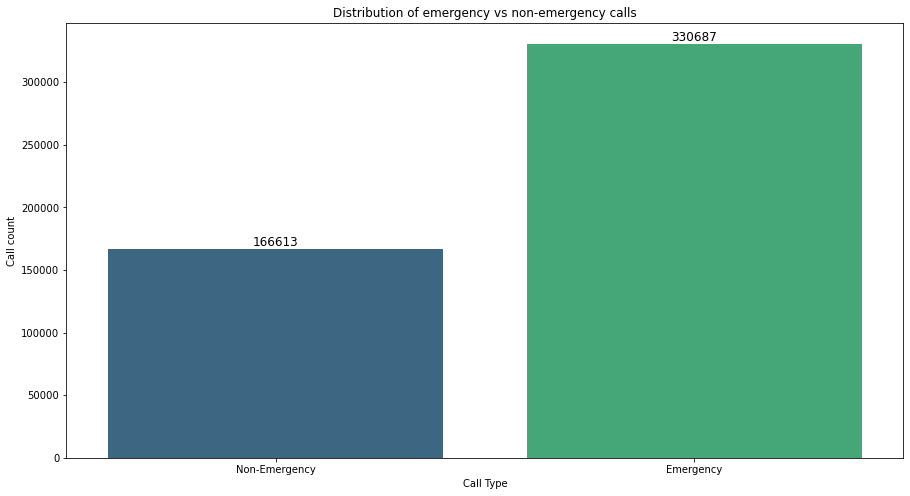

In [5]:
# Using a countplot to show the call distribution based on incident type
fig = plt.subplots(figsize=(15,8))
ax = sns.countplot(x='call_type',data=results_df,palette='viridis')
# Set the title and x and y axis labels
ax.set_title("Distribution of emergency vs non-emergency calls")
ax.set(xlabel='Call Type', ylabel = 'Call count')

# Iterate through the list of axes' patches
for p in ax.patches:
    # Function to print the %'s for each of the bar
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')    
    
plt.show()

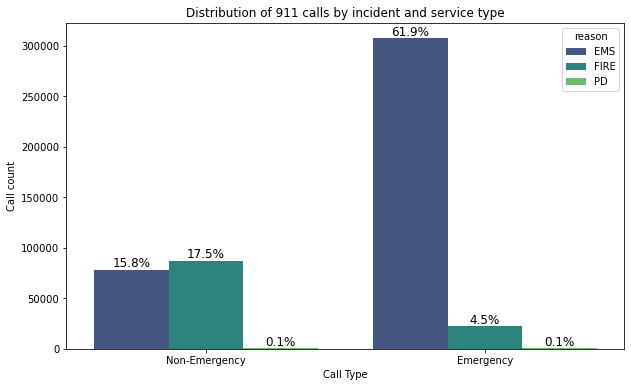

In [6]:
# Using a countplot to show the call distribution based on incident and service type
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='call_type',data=results_df,palette='viridis', hue = 'reason')
# Set the title and x and y axis labels
ax.set_title("Distribution of 911 calls by incident and service type")
ax.set(xlabel='Call Type', ylabel = 'Call count')
total = float(len(results_df))
# Iterate through the list of axes' patches
for p in ax.patches:
    height = p.get_height()
    # Function to print the %'s for each of the bar
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(100 * height/total),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

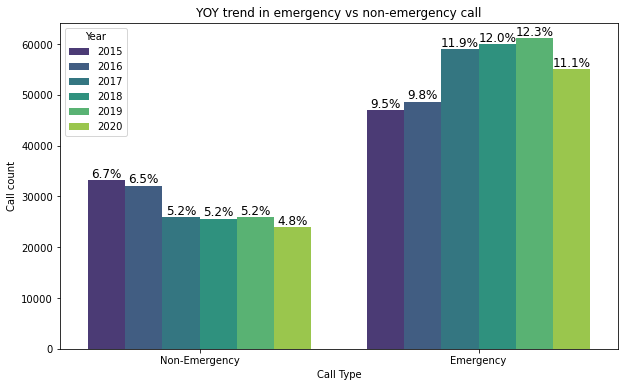

In [7]:
# Using a countplot to show the call distribution over the year based on incident type
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='call_type',data=results_df,palette='viridis', hue = 'Year')
# Set the title and x and y axis labels
ax.set(xlabel='Call Type', ylabel = 'Call count')
ax.set_title("YOY trend in emergency vs non-emergency call")
total = float(len(results_df))
# Iterate through the list of axes' patches
for p in ax.patches:
    height = p.get_height()
    # Function to print the %'s for each of the bar
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(100 * height/total),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### **RQ1:** In the last 5 years, what are the top reasons that contribute to emergency and non-emergency 911 calls?

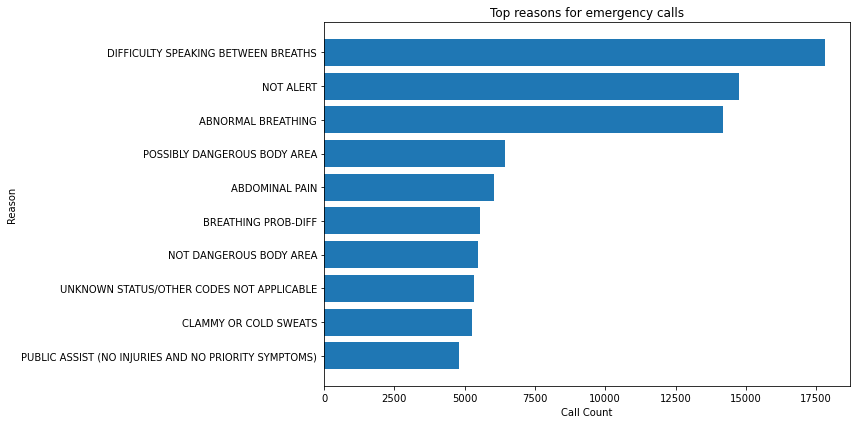

In [8]:
# Filter the dataframe to emergency calls
emergency_reason = results_df.loc[results_df['call_type'] == 'Emergency']
# Get the top 10 reasons for emergency calls
emergency_reason = emergency_reason['incident_type_desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
x = list(emergency_reason.index)
y = list(emergency_reason.values)
x.reverse()
y.reverse()

# Set the title and x and y axis labels
plt.title("Top reasons for emergency calls")
plt.ylabel("Reason")
plt.xlabel("Call Count")

# plot the visual using a horizontal barplot
plt.barh(x,y)
plt.tight_layout()
plt.show()

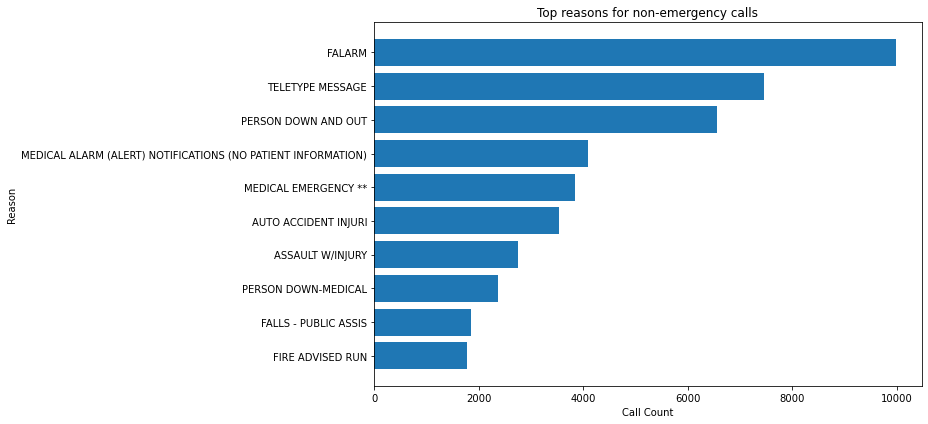

In [9]:
# Filter the dataframe to non-emergency calls
non_emergency_reason = results_df.loc[results_df['call_type'] == 'Non-Emergency']
# Get the top 10 reasons for non-emergency calls
non_emergency_reason = non_emergency_reason['incident_type_desc'].value_counts().head(10)

plt.figure(figsize=(13, 6))
x = list(non_emergency_reason.index)
y = list(non_emergency_reason.values)
x.reverse()
y.reverse()

# Set the title and x and y axis labels
plt.title("Top reasons for non-emergency calls")
plt.ylabel("Reason")
plt.xlabel("Call Count")

# plot the visual using a horizontal barplot
plt.barh(x,y)
plt.tight_layout()
plt.show()

**Findings:**

* The most common reason for emergency calls were difficulty speaking between breaths, person not alert, abnormal breathing and injury to dangerous body area which can be broadly categorized as medical emegencies. 
* The top reasons for non-emergency calls were false fire alarms, teletype messages, fire advised run and auto accident injuries.
* Interestingly, “person down and out” and “medical emergency” were coded as non-emergency calls. 

### **RQ2a:** How long does it actually take from the time you dial 911 for the first responders to arrive (average response time)? 

In [10]:
# creating a column to group the average response time based on response_rate_minutes field
results_df.loc[(results_df['response_rate_minutes']> 0) & (results_df['response_rate_minutes']<=5), 'series'] = 'Within 5 Minutes'  
results_df.loc[(results_df['response_rate_minutes']> 5) & (results_df['response_rate_minutes']<= 10), 'series'] = 'Within 6-10 Minutes'
results_df.loc[(results_df['response_rate_minutes']> 10) & (results_df['response_rate_minutes']<=60), 'series'] = 'Within 11-60 Minutes'
results_df.loc[(results_df['response_rate_minutes']> 60) , 'series'] = 'Longer than an hour'

In [11]:
# Filter the dataset to exclude null and negative response time
avg_response_year = results_df[results_df['response_rate_minutes'] > 0]

# Filter the dataframe to 2015 and calculate the average response time
avg_response_year_2015 = avg_response_year[avg_response_year['Year'] == 2015]
avg_response_year_2015 = round(avg_response_year_2015.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

# Filter the dataframe to 2016 and calculate the average response time
avg_response_year_2016 = avg_response_year[avg_response_year['Year'] == 2016]
avg_response_year_2016 = round(avg_response_year_2016.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

# Filter the dataframe to 2017 and calculate the average response time
avg_response_year_2017 = avg_response_year[avg_response_year['Year'] == 2017]
avg_response_year_2017 = round(avg_response_year_2017.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

# Filter the dataframe to 2018 and calculate the average response time
avg_response_year_2018 = avg_response_year[avg_response_year['Year'] == 2018]
avg_response_year_2018 = round(avg_response_year_2018.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

# Filter the dataframe to 2019 and calculate the average response time
avg_response_year_2019 = avg_response_year[avg_response_year['Year'] == 2019]
avg_response_year_2019 = round(avg_response_year_2019.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

# Filter the dataframe to 2020 and calculate the average response time
avg_response_year_2020 = avg_response_year[avg_response_year['Year'] == 2020]
avg_response_year_2020 = round(avg_response_year_2020.groupby(['call_type']).agg({'response_rate_minutes': ['mean']}),2)

In [12]:
# Filter to exclude negative response time
avg_response_year = round(avg_response_year.agg({'response_rate_minutes': ['mean']}),2)
print(color.BOLD + "The average response time in Cincinnati for the past 5 years is",avg_response_year.iloc[0]['response_rate_minutes'], "minutes" + color.END)

The average response time in Cincinnati for the past 5 years is 5.81 minutes


<AxesSubplot:title={'center':'YOY trend in Average Call Response Time'}, xlabel='Year', ylabel='Average Response time'>

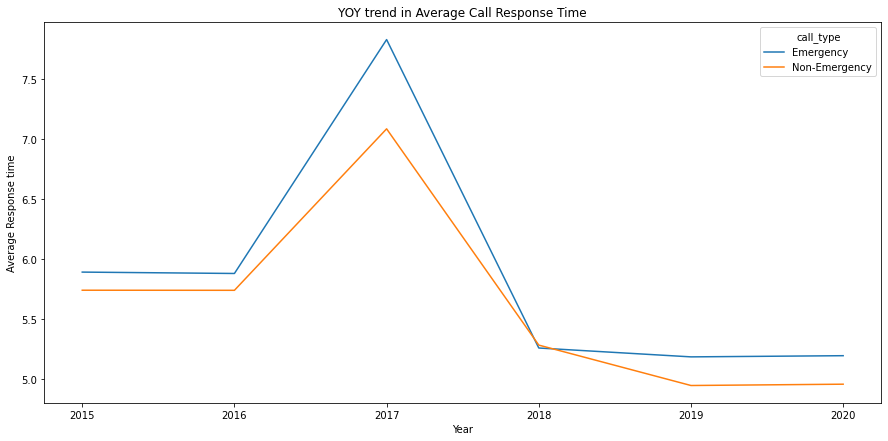

In [13]:
# Using a line plot to show the average response time over the years
fig, ax = plt.subplots(figsize=(15,7))
# Set the title and x and y axis labels
plt.title("YOY trend in Average Call Response Time")
ax.set(xlabel='Year', ylabel = 'Average Response time')
avg_response_year = results_df[results_df['response_rate_minutes'] > 0]
avg_response_year.groupby(['Year','call_type']).mean()['response_rate_minutes'].unstack().plot(ax=ax)

### **RQ2b:** Has the response time reduced over the years and is it lesser for emergency calls?

In [14]:
# Printing the output in a tabular format using the tabulate package
print('\n')
print(color.BOLD + "YOY Average call response time (minutes)" + color.END)
print('\n')
print(tabulate([['Emergency',avg_response_year_2015.iloc[0,0],avg_response_year_2016.iloc[0,0], \
                 avg_response_year_2017.iloc[0,0],avg_response_year_2018.iloc[0,0], \
                 avg_response_year_2019.iloc[0,0],avg_response_year_2020.iloc[0,0]], \
                ['Non-Emergency',avg_response_year_2015.iloc[1,0],avg_response_year_2016.iloc[1,0], \
                 avg_response_year_2017.iloc[1,0],avg_response_year_2018.iloc[1,0], \
                 avg_response_year_2019.iloc[1,0],avg_response_year_2020.iloc[1,0]]],
               headers = ['Call Type','FY2015','FY2016','FY2017','FY2018','FY2019','FY2020'], tablefmt='orgtbl',floatfmt='.2f'))



YOY Average call response time (minutes)


| Call Type     |   FY2015 |   FY2016 |   FY2017 |   FY2018 |   FY2019 |   FY2020 |
|---------------+----------+----------+----------+----------+----------+----------|
| Emergency     |     5.89 |     5.88 |     7.83 |     5.26 |     5.19 |     5.20 |
| Non-Emergency |     5.74 |     5.74 |     7.08 |     5.29 |     4.95 |     4.96 |


In [15]:
# Filter the dataset to exclude null and negative response time
positive_response = results_df[results_df['response_rate_minutes'] > 0]
# Calculate the % of calls serviced within x minutes
result_q = round(results_df.groupby(['call_type','series']).agg(['count'])/(len(positive_response['reason']))* 100,2)

In [16]:
# Printing the output in a tabular format using the tabulate package
print('\n')
print(color.BOLD + 'Percentage of emergency 911 calls resolved with x minutes' + color.END)
print('\n')
print(tabulate([['Emergency',result_q.iloc[2,0], result_q.iloc[3,0],result_q.iloc[1,0], result_q.iloc[0,0]], \
                 ['Non-Emergency',result_q.iloc[6,0], result_q.iloc[7,0],result_q.iloc[5,0], result_q.iloc[4,0] ]],
               headers = ['Call Type','Within 5 Minutes','Within 6-10 Minutes','11 Minutes-1 Hour','Longer than an hour'], tablefmt='orgtbl'))



Percentage of emergency 911 calls resolved with x minutes


| Call Type     |   Within 5 Minutes |   Within 6-10 Minutes |   11 Minutes-1 Hour |   Longer than an hour |
|---------------+--------------------+-----------------------+---------------------+-----------------------|
| Emergency     |              38.55 |                 33.77 |                3.98 |                  0.07 |
| Non-Emergency |              13.73 |                  8.59 |                1.26 |                  0.05 |


**Findings:**

* The average response time is 5.81 minutes in Cincinnati for the past 5 years. 
* The response time has reduced over the years with FY2017 being an exception.
* Nearly, 70% of the emergency calls were responded within 5 to 10 minutes of receiving the calls. 
* However, the response time for non-emergency calls were less compared to emergency calls.

### **RQ3:** Does temporal variations in emergency calls exists within weekdays and time of the day?

In [17]:
# creating a column to group the hours based on time_of_the_day field
# 11 PM to 6:59 AM is categorized as Night
results_df.loc[results_df.Hour.isin([23,24,1,2,3,4,5,6]), 'time_of_the_day'] = 'Night'  
# 3 PM to 11:59 AM is categorized as Evening
results_df.loc[(results_df['Hour']>= 15 ) & (results_df['Hour']< 23), 'time_of_the_day'] = 'Evening'
# 7 AM to 2:59 PM is categorized as Morning
results_df.loc[(results_df['Hour']>= 7) & (results_df['Hour']< 15), 'time_of_the_day'] = 'Morning'

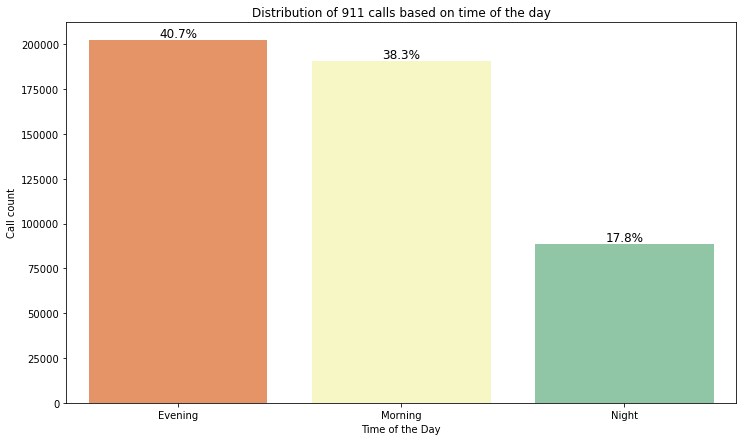

In [18]:
# Using a countplot to show the call distribution based on time of the day
plt.figure(figsize=(12,7))
ax = sns.countplot(x=results_df.time_of_the_day,order=results_df['time_of_the_day'].value_counts().sort_values(ascending=False).index[:50],palette='Spectral')

# Set the title and x and y axis labels
ax.set_title("Distribution of 911 calls based on time of the day")
ax.set(xlabel='Time of the Day', ylabel = 'Call count')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = p.get_height()
    # Function to print the %'s for each of the bar
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(100 * height/float(len(results_df))),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

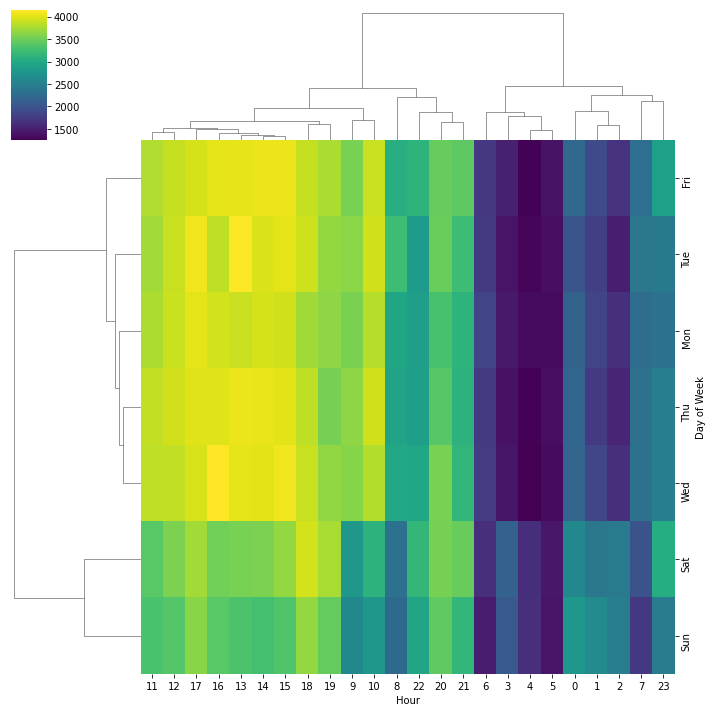

In [19]:
# Pivot the data by day of the week and hour
dayHour = results_df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
# Plot using a clustermap to show associations between the day of the week and hour
ax = sns.clustermap(dayHour,cmap='viridis') 

**Findings:**

* There isn’t any significant variations in 911 calls between weekdays and time of the day with call counts marginally less during weekends.
* 41% of the calls occurred between 3 PM and 11:59 PM followed by 38% of calls between 7 AM and 2.59PM.

### VII. Discussion

#### Implications

The aim of this explorative study was to explore the causes, the average response time and temporal patterns within weekdays and time of the day in Cincinnati's 911 calls. It was found that 66% of all 911 calls were emergency calls which may reflect the magnitude of need for emergency care in Cincinnati. The average response time was 5.81 minutes with 70% of the emergency calls responded within 5 to 10 minutes of receiving the call. There isn't any pattern in the call volume over days of the week and the time of the day. Due to lack of comparative studies across cities, it is not clear if these results are as expected or beyond normal. Hence, comparison with other cities would be valuable in terms of identifying opportunities for measuring efficiencies. But one should remember that incidents might vary in different cities and settings depending on culture, educational level, and race and/or socio economic status.

**Most common causes:**

Interestingly, the common causes for emergency calls can be categorized broadly as medical emergencies and knowledge about these causes can be used at various levels as it provides an opportunity for disease surveillance and monitoring that are important from a public health perspective. When looking at the non-emergency calls, "False fire alarm" and "Tele Type messages" were among the top reasons. False fire alarms cause disruptions and put lives in danger when a real alarm is ignored and hence looking at ways to reduce false fire alarms can be worthy. It is unclear as to why "Person down and out", "medical emergencies were assigned as non-emergency category. A couple of hypothesis could be human error when an agent coded the incident by mistake or false/prank calls where an agent received a call that ended up being a prank or false information. Such miscoded incidents might imply potentially missed opportunities for proper and timely emergency care. 

**Average Response time:**

Response time is defined as the time between the call coming into a 911 system and responders arriving at the scene. The average response time in Cincinnati for the past 5 years is 5.81 minutes and has reduced over the years with FY2017 being an exception. 

There are several factors that could affect the response time such as the population growth of the neighborhood, availability of the officers, traffic and the call volume at the time. It’s possible that rapidly growing cities simply outpace police departments and their ability to scale their resources to accommodate these rising populations. In fact, one of the most common metrics used to assess police performance is response time. It would be further interesting to see if the response time appears to be statistically significant with making an arrest or even closing the case. 


**Temporal variation in emergency calls:**

The analysis did not show significant variations in 911 calls both within weekdays and time of the day. Exact reasons for this pattern is unknown but the results may generate hypotheses and have implications. This analysis could be medically important as further studies can help focus on ambulance and other medical services. 

The analysis included all calls to 911 where a service response was provided. The majority of the emergency calls were seen during daytime and evening which can be attributed to the high occurrence of road traffic accidents in the morning and afternoon rush hours. These insights could be used in planning and monitoring health care and infrastructure interventions by combining them with geographical data to help build a better community.

Finally the magnitude of such problems illustrates the complexity of dispatchers’ handling and triaging of emergency calls. Language barriers, callers’ emotional state, callers’ ability to describe the situation or the medical dispatchers’ skills in asking proper questions may affect the situation. Therefore, it is important to design and maintain systems that support the dispatchers decision making process along with offering them sufficient education and communication training.

#### Limitations

The analysis did reveal interesting results, however with some limitations. My aim was to investigate the call patterns with demographics data in terms of age, income and race. The unavailability of the zip code or other geographical codes made it quite impossible to explore the demographics data vs 911 call patterns which could have resulted in further intuitive insights such as call volumes being high in areas with more senior citizens or to understand if the call volumes varied by neighborhoods with specific ethnicity and/or income. Also, the study was limited to just Cincinnati as the schema for 911 dataset is different across cities. It would take time, effort and expertise to be able to combine all these data to perform comparative analysis and increase the generalizability of the identified patterns. The response time was calculated based on specific variables from the 911 dataset. These variable had 16% of missing and incorrect values which was excluded for the analysis of the average response rate. Finally, the analysis was conducted based on the assumption that the incidents were coded (emergency or not) correctly by the agents which otherwise could undermine the results in its entirety. 


#### Future work

The study was limited to the available data and time and can be expanded by further research to develop knowledge and gather existing data in areas stated below – 

* **Clarity on disposition code** – Further research is required to examine the nature and volume of the call types to determine how they are used to inform agencies decision making and practice, and whether new categories for call type should be included in CAD systems.

* **Response time metric** - Given that a substantial number of calls are still non-emergency, there is a real question whether a rapid response is necessary or even effective. Prioritizing resources for emergency calls could produce more favorable results. 

* **Data collection** - The ways in which data is collected currently makes certain analyses such as identifying frequent callers very difficult. Enhancing data collection capabilities without compromising the ethical implications of exposing personally identifiable information is key to better understanding and assessing what factors contribute to and ultimately can be used to prevent calls in future.

* **Alternative response options** - Overall, despite the availability in alternative response programs, there is still a need for additional innovation to both reduce the non-emergency calls reaching 911 and to improve the quality of responses.


###  VIII. Conclusion

After analyzing more than 499k records of Cincinnati’s 911 call dataset, it was found that 66% of all Cincinnati 911 calls received are emergency calls, of which 61% are handled by emergency medical service (EMS) with the rest being handled by fire and police department. We have seen a 12% decrease in response time since 2015 with a current average response time of 5.81 minutes in Cincinnati The study did not exhibit much of temporal variations for 911 calls both within weekdays and time of the day. However, the analysis indicates inconsistencies in categories under which the calls are logged and demands for further deep dives and effort to standardize the categories to avoid individual departments from using codes developed locally. A huge % of missing data could be the result of technical problems (both machine and human related) associated with the CAD system that collects the 911 information. Regular system maintenance and upgrade can help address technical glitches caused by machines. Whereas, frequent trainings can help reduce human related technical errors. Finally, the most commonly collected data about 911 calls tends to be broad and limited and improvising the data collection methods can allow researchers to develop insights with much broader applications. Therefore, there is a pressing need for more innovation in this space and for research exploring key features of the system, including call volume, type, and outcomes at the national, state, and local level. Understanding the landscape of 911 call processing at a deeper level gives a chance to develop sound alternatives beyond police responses and to inform and transform the current policy and practices.

### References

[1] https://www.policeforum.org/assets/EmergencyCommunications.pdf

[2] https://www.ncjrs.gov/pdffiles1/nij/226874.pdf

[3] http://hpcf-files.umbc.edu/research/papers/IS789_Project_Report-HPCF-2019-29.pdf

[4] https://opendatacommons.org/licenses/pddl/1-0/
